# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [ ]:
#pip install pandas-datareader

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [2]:
start=datetime.datetime(2006,1,1)
end=datetime.datetime(2016,1,1)

In [3]:
BAC = data.DataReader("BAC", 'yahoo', start, end)
C = data.DataReader("C", 'yahoo', start, end)
GS = data.DataReader("GS", 'yahoo', start, end)
JPM = data.DataReader("JPM", 'yahoo', start, end)
MS = data.DataReader("MS", 'yahoo', start, end)
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [4]:
# set a few null values
np.random.seed(1234)
r1=np.random.choice(len(BAC), 50,replace=False)
r2=np.random.choice(len(C), 100,replace=False)
r3=np.random.choice(len(GS), 200,replace=False)
r4=np.random.choice(len(WFC), 300,replace=False)

In [5]:
BAC.loc[BAC.index[r1]]=np.nan
C.loc[C.index[r2]]=np.nan
GS.loc[GS.index[r3]]=np.nan
WFC.loc[WFC.index[r4]]=np.nan

In [6]:
tickers=['WFC','BAC','C','GS','JPM','MS']
tickers.sort()
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [7]:
bank_stocks=pd.concat([BAC,C,GS,JPM,MS,WFC],keys=tickers,axis=1)
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [8]:
bank_stocks[:2]

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   34.425114  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.059509  491.000000  483.500000  488.600006  483.799988  ...   

Bank Ticker         MS                                      WFC          \
Stock Info        Open      Close     Volume  Adj Close    High     Low   
Date                                                                      
2006-01-03   57.169998  58.310001  5377000.0  36.631054  31.975  31.195   
2006-01-04   58.700001  58.349998  7977800.0  36.656166  31.820  31.365   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.613142  
2006-01-04   31.799999  31.530001  10870000.0  20.374050  

[2 rows x 36 columns]

In [27]:
bank_stockmelt=pd.melt(bank_stocks.reset_index(level=0),id_vars=['Date'])

In [29]:
bank_stockmelt.set_index('Date',inplace=True)

In [31]:
bank_stockmelt[:2]

,Bank Ticker,Stock Info,value
Date,,,
2006-01-03,BAC,High,47.180000
2006-01-04,BAC,High,47.240002


In [37]:
bank_stockmelt.groupby(['Bank Ticker','Stock Info']).mean()

value
Bank Ticker Stock Info              
BAC         Adj Close   1.817418e+01
            Close       2.215247e+01
            High        2.245152e+01
            Low         2.187383e+01
            Open        2.217947e+01
            Volume      1.333360e+08
C           Adj Close   1.170923e+02
            Close       1.435900e+02
            High        1.456014e+02
            Low         1.418606e+02
            Open        1.439054e+02
            Volume      2.863784e+07
GS          Adj Close   1.362251e+02
            Close       1.585443e+02
            High        1.605084e+02
            Low         1.565160e+02
            Open        1.585325e+02
            Volume      7.963735e+06
JPM         Adj Close   3.537075e+01
            Close       4.598555e+01
            High        4.654046e+01
            Low         4.540528e+01
            Open        4.598422e+01
            Volume      3.081350e+07
MS          Adj Close   2.779265e+01
            Close       3.600620e+01
            High        3.655656e+01
            Low         3.544430e+01
            Open        3.602157e+01
            Volume      1.758182e+07
WFC         Adj Close   2.679976e+01
            Close       3.551529e+01
            High        3.593536e+01
            Low         3.508634e+01
            Open        3.551857e+01
            Volume      3.284329e+07

In [13]:
[len(x) for x in [BAC,C,GS,JPM,MS,WFC]]

[2517, 2517, 2517, 2517, 2517, 2517]

In [ ]:
#bank_stocks.info()

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

** Set the column name levels (this is filled out for you):**

In [14]:
bank_stocks.isnull().sum()

Bank Ticker  Stock Info
BAC          High           50
             Low            50
             Open           50
             Close          50
             Volume         50
             Adj Close      50
C            High          100
             Low           100
             Open          100
             Close         100
             Volume        100
             Adj Close     100
GS           High          200
             Low           200
             Open          200
             Close         200
             Volume        200
             Adj Close     200
JPM          High            0
             Low             0
             Open            0
             Close           0
             Volume          0
             Adj Close       0
MS           High            0
             Low             0
             Open            0
             Close           0
             Volume          0
             Adj Close       0
WFC          High          300
             Lo

<AxesSubplot:xlabel='Bank Ticker-Stock Info', ylabel='Date'>

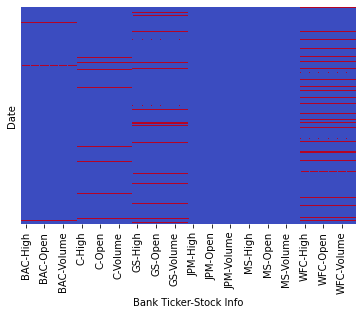

In [15]:
sns.heatmap(bank_stocks.isnull(), cbar=False,yticklabels=False,cmap='coolwarm')

** Check the head of the bank_stocks dataframe.**

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [16]:
[bank_stocks[b]['Close'].max() for b in tickers]

[54.900001525878906,
 564.0999755859375,
 247.9199981689453,
 70.08000183105469,
 89.30000305175781,
 58.52000045776367]

In [ ]:
#gbbank=bank_stocks['Close'].groupby(by='Bank Ticker',axis=1)

In [ ]:
#gbbank.mean(axis)

In [26]:
bank_stocks.xs('Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [38]:
# how to calc customized returns () by defining a func and using apply?

In [18]:
returns=bank_stocks.xs('Close',axis=1,level='Stock Info').pct_change()

In [19]:
returns.head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,0.000000
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.000000
2006-01-09,0.000644,-0.004731,0.000000,0.016242,0.010586,0.000000


In [20]:
def calcRet(tks):
    res=[]
    for tk in tks:
        res.append(bank_stocks[tk]['Close'].pct_change().rename(tk+' Return'))
    return res
returns=calcRet(tickers)

In [21]:
returns=pd.DataFrame(returns).transpose()

In [ ]:
# returns=pd.DataFrame()
# for tk in tickers:
#     returns[tk+' Return']=bank_stocks[tk]['Close'].pct_change()

** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

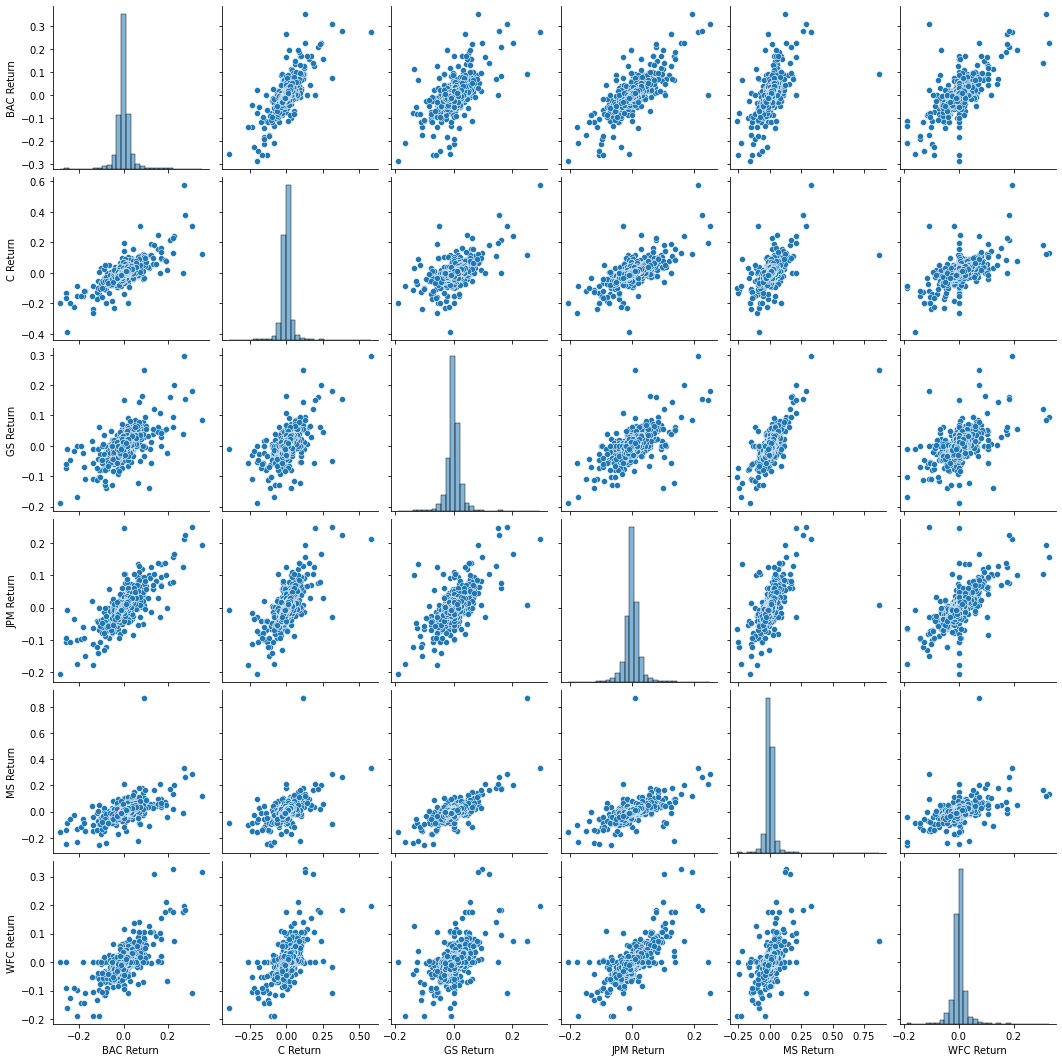

In [22]:
#sns.pairplot(data=returns,diag_kws = {'alpha':0.55, 'bins':30})
sns.pairplot(data=returns[1:],diag_kws = {'alpha':0.55, 'bins':30})

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [23]:
[returns[b][returns[b]==returns[b].min()].index for b in returns.columns]
[returns[b][returns[b]==returns[b].min()] for b in returns.columns]

[Date
 2009-01-20   -0.289694
 Name: BAC Return, dtype: float64,
 Date
 2009-02-27   -0.390244
 Name: C Return, dtype: float64,
 Date
 2009-01-20   -0.189596
 Name: GS Return, dtype: float64,
 Date
 2009-01-20   -0.207274
 Name: JPM Return, dtype: float64,
 Date
 2008-10-09   -0.258929
 Name: MS Return, dtype: float64,
 Date
 2009-01-16   -0.19029
 Name: WFC Return, dtype: float64]

In [ ]:
returns.idxmin()

In [ ]:
returns['BAC Return'].argmin()

In [ ]:
returns.idxmin()

In [ ]:
[returns[b][returns[b]==returns[b].max()] for b in returns.columns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [24]:
returns.std()

BAC Return    0.036393
C Return      0.038033
GS Return     0.025291
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.028626
dtype: float64

In [25]:
returns.loc[returns.index.year==2015].std()

BAC Return    0.015888
C Return      0.014691
GS Return     0.014088
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012808
dtype: float64

In [ ]:
returns.loc['2015-01-01':'2015-12-31'].std()

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

In [ ]:
sns.set_theme()
sns.displot(returns.loc[returns.index.year==2015,'MS Return'],kind='hist',color='green')
#sns.distplot(returns.loc[returns.index.year==2015,'MS Return'],color='green')

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

In [ ]:
sns.displot(returns.loc[returns.index.year==2008,'C Return'])

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [ ]:
#pip install plotly
#pip install cufflinks

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
#%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

In [ ]:
bank_stocks.xs('Close',axis=1,level='Stock Info').plot(figsize=(12, 5))

In [ ]:
bank_stocks.columns

In [ ]:
[bank_stocks[tk,'Close'].plot(label=tk,figsize=(12,4)) for tk in tickers]
plt.legend()

In [ ]:
bank_stocks[bank_stocks.index.year=2008]

In [ ]:
bank_stocks['BAC']['Close'][bank_stocks.index.year==2008].plot(figsize=(12, 5),label='BAC')
bank_stocks['BAC']['Close'][bank_stocks.index.year==2008].rolling(30).mean().plot(label='Moving')
plt.legend()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

** Create a heatmap of the correlation between the stocks Close Price.**

In [ ]:
bank_stocks.xs('Close',axis=1,level='Stock Info').corr()

In [ ]:
sns.heatmap(bank_stocks.xs('Close',axis=1,level='Stock Info').corr(),annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

In [ ]:
sns.clustermap(bank_stocks.xs('Close',axis=1,level='Stock Info').corr(),annot=True)

In [ ]:
all_data = {ticker: web.get_data_yahoo(ticker) for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG','SPX']}

In [ ]:
price = pd.DataFrame({ticker: data['Adj Close'] for ticker, data in all_data.items()})
volume = pd.DataFrame({ticker: data['Volume'] for ticker, data in all_data.items()})

# My own analysis
## how to calc moving avg, corr, var, regression beta?
## how to impute missing value for each group?

In [57]:
bank_stockmelt[:3]

,Bank Ticker,Stock Info,value
Date,,,
2006-01-03,BAC,High,47.180000
2006-01-04,BAC,High,47.240002
2006-01-05,BAC,High,46.830002


In [61]:
bank_stockmelt.isnull().sum()

Bank Ticker       0
Stock Info        0
value          3900
dtype: int64

In [62]:
bank_stockmelt.groupby(['Bank Ticker','Stock Info']).apply(lambda g: g.fillna(g.mean()))

Bank Ticker Stock Info         value
Bank Ticker Stock Info Date                                           
BAC         Adj Close  2006-01-03         BAC  Adj Close  3.442511e+01
                       2006-01-04         BAC  Adj Close  3.405951e+01
                       2006-01-05         BAC  Adj Close  3.410338e+01
                       2006-01-06         BAC  Adj Close  3.405220e+01
                       2006-01-09         BAC  Adj Close  3.407411e+01
...                                       ...        ...           ...
WFC         Volume     2015-12-24         WFC     Volume  3.284329e+07
                       2015-12-28         WFC     Volume  8.288800e+06
                       2015-12-29         WFC     Volume  7.894900e+06
                       2015-12-30         WFC     Volume  8.016900e+06
                       2015-12-31         WFC     Volume  1.092980e+07

[90612 rows x 3 columns]